In [ ]:
!pip install --upgrade --no-cache-dir gdown
!pip install contractions
!pip install transformers
!gdown --id 1Bm_mnWN2lrCcrvtDOh10JtXlowYc4Jfo #utils
!gdown --id 1JD0iEu-1hbqpEnAokjXj6YhohkYdw2h6 #network
!gdown --id 1AzwmDr5e4dzNtEjCP9PE8bUc_zRv12P5 #dataset
!gdown --id 1yVfLxAPubn-b4ZWnKX9-lvnXT6OzmGCt #text free images
!gdown --id 1cQnxpWJwSUitkzX5mOiNpuF33poY2mR- #Annotation File

     |████████████████████████████████| 106 kB 10.1 MB/s 
     |████████████████████████████████| 287 kB 80.7 MB/s 
     |████████████████████████████████| 4.0 MB 9.7 MB/s 
     |████████████████████████████████| 77 kB 8.4 MB/s 
     |████████████████████████████████| 6.6 MB 31.4 MB/s 
     |████████████████████████████████| 895 kB 71.8 MB/s 
     |████████████████████████████████| 596 kB 66.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Bm_mnWN2lrCcrvtDOh10JtXlowYc4Jfo
To: /content/utils_transformer.py
100% 2.52k/2.52k [00:00<00:00, 3.26MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: Future

In [ ]:
#Load model
from google.colab import drive
import shutil
def save_model(model):
  #Saving the best model to drive
  drive.mount('/content/drive')
  shutil.copy("/content/" + model, "/content/drive/MyDrive/Dl thesis/model")
  print("Model Saved")
  drive.flush_and_unmount()

def load_model(model):
  drive.mount('/content/drive')
  shutil.copy("/content/drive/MyDrive/Dl thesis/model/" + model, '/content/')
  print("Model Loaded")
  drive.flush_and_unmount()

In [ ]:
import pandas as pd
import os
from torch.utils.data import Dataset
from PIL import Image
import spacy  
import torch
from torch.nn.utils.rnn import pad_sequence  
import string
import re
import contractions
import torchvision.transforms as transforms
from transformers import DistilBertTokenizer, DistilBertModel, DistilBertConfig

In [ ]:
!ls
!unzip annotation_file.zip
!unzip text_free_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: text_free_images/memes_1615.png  
  inflating: __MACOSX/text_free_images/._memes_1615.png  
  inflating: text_free_images/covid_memes_3086.png  
  inflating: __MACOSX/text_free_images/._covid_memes_3086.png  
  inflating: text_free_images/memes_3764.png  
  inflating: __MACOSX/text_free_images/._memes_3764.png  
  inflating: text_free_images/covid_memes_3938.png  
  inflating: __MACOSX/text_free_images/._covid_memes_3938.png  
  inflating: text_free_images/memes_1173.png  
  inflating: __MACOSX/text_free_images/._memes_1173.png  
  inflating: text_free_images/memes_847.png  
  inflating: __MACOSX/text_free_images/._memes_847.png  
  inflating: text_free_images/memes_1167.png  
  inflating: __MACOSX/text_free_images/._memes_1167.png  
  inflating: text_free_images/memes_6608.png  
  inflating: __MACOSX/text_free_images/._memes_6608.png  
  inflating: text_free_images/memes_853.png  
  inflating: __MACOSX/text_free_images/._

In [ ]:
!mv text_free_images Images
!ls

annotation_file		Images			sample_data
annotation_file.zip	__MACOSX		text_free_images.zip
dataset_transformer.py	network_transformer.py	utils_transformer.py


In [ ]:
import os
import torch
import numpy as np
from utils_transformer import *
from network_transformer import *
from dataset_transformer import *
from torch.optim import Adam
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from transformers import DistilBertTokenizer, DistilBertModel, DistilBertConfig

Using cuda device


Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
roletolabel = {'hero' : 0, 'villain' : 1, 'victim' : 2, 'other' : 3}

In [ ]:
train_df = pd.read_csv("./annotation_file/train.csv")
train_df

,Name,Text,Entity,Role
0,covid_memes_252.png,kwai\ngkwa 0964\n#nnevvy\napplause to Thais fr...,thais,hero
1,covid_memes_20.png,best candidate for\nJA\n2020\njoe biden\nKamal...,joe biden,hero
2,covid_memes_60.png,MASK\nTRUMP\nTRUMP\nDEN CE\nHelp your child fi...,donald trump,hero
3,covid_memes_493.png,BARACK OBAMA PRESENTS\nA MEDAL TO HIMSELF.\nFO...,barack obama,hero
4,covid_memes_321.png,*New Swine flu like virus with\nhuman pandemic...,china,hero
...,...,...,...,...
17523,memes_982.png,Biden-Obama\nMemes\n300. Funny & Hillarious\nM...,biden obama meme,other
17524,memes_982.png,Biden-Obama\nMemes\n300. Funny & Hillarious\nM...,john robinson,other
17525,memes_982.png,Biden-Obama\nMemes\n300. Funny & Hillarious\nM...,memes,other
17526,memes_982.png,Biden-Obama\nMemes\n300. Funny & Hillarious\nM...,joe biden,other


In [ ]:
train_df['Role'] = train_df['Role'].map({'hero' : 0, 'villain' : 1, 'victim' : 2, 'other' : 3})
train_df

,Name,Text,Entity,Role
0,covid_memes_252.png,kwai\ngkwa 0964\n#nnevvy\napplause to Thais fr...,thais,0
1,covid_memes_20.png,best candidate for\nJA\n2020\njoe biden\nKamal...,joe biden,0
2,covid_memes_60.png,MASK\nTRUMP\nTRUMP\nDEN CE\nHelp your child fi...,donald trump,0
3,covid_memes_493.png,BARACK OBAMA PRESENTS\nA MEDAL TO HIMSELF.\nFO...,barack obama,0
4,covid_memes_321.png,*New Swine flu like virus with\nhuman pandemic...,china,0
...,...,...,...,...
17523,memes_982.png,Biden-Obama\nMemes\n300. Funny & Hillarious\nM...,biden obama meme,3
17524,memes_982.png,Biden-Obama\nMemes\n300. Funny & Hillarious\nM...,john robinson,3
17525,memes_982.png,Biden-Obama\nMemes\n300. Funny & Hillarious\nM...,memes,3
17526,memes_982.png,Biden-Obama\nMemes\n300. Funny & Hillarious\nM...,joe biden,3


In [ ]:
labels, count = np.unique(train_df['Role'], return_counts = True)
print(labels, count)
class_weights = [sum(count)/ c for c in count ]
class_weights

[0 1 2 3] [  471  2441   903 13713]


[37.21443736730361, 7.180663662433429, 19.410852713178294, 1.278203164880041]

In [ ]:
example_weights = [class_weights[e] for e in train_df['Role']]

In [ ]:
sampler = torch.utils.data.WeightedRandomSampler(example_weights, 9000)

In [ ]:
import pandas as pd
metric_df_transform = pd.DataFrame(columns = ['Train Loss', 'Validation Loss', 'Train Accuracy', 'Validation Accuracy', 'Train Weighted F1', 'Validation Weighted F1', 'Train Macro F1', 'Validation Macro F1'])

In [ ]:
transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

In [ ]:
train_dataset = Custom_Tfm(r"Images", r"./annotation_file/train.csv", transform, max_length=100,roletolabel = roletolabel)
train_loader = DataLoader(dataset=train_dataset, batch_size = 32, num_workers = 0, pin_memory=True, sampler=sampler)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
val_dataset = Custom_Tfm(r"Images", r"./annotation_file/val.csv",  transform, max_length = 100, roletolabel = roletolabel)
val_loader = DataLoader(dataset=val_dataset, batch_size = 32, num_workers = 0, shuffle=True, pin_memory=True)

In [ ]:
print(len(train_loader.dataset), len(val_loader.dataset))
print(len(train_loader), len(val_loader))

17528 2075
250 65


In [ ]:
embeddings = DistilBertModel.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
prev_lr=1e-5

In [ ]:
load_model(f"attention_model_latest_epoch_tfm_{prev_lr}.pth")
load_model(f"final_attention_model_tfm_{prev_lr}.pth")

Mounted at /content/drive
Model Loaded
Mounted at /content/drive
Model Loaded


In [ ]:
!ls -lrth

total 2.2G
drwxr-xr-x 2 root root 248K Apr 10 10:14 Images
drwxr-xr-x 2 root root 4.0K Apr 10 12:09 annotation_file
drwxr-xr-x 1 root root 4.0K Apr 19 14:23 sample_data
-rw-r--r-- 1 root root 2.5K Apr 26 15:58 utils_transformer.py
-rw-r--r-- 1 root root 4.4K Apr 26 15:58 network_transformer.py
-rw-r--r-- 1 root root 2.6K Apr 26 15:58 dataset_transformer.py
-rw-r--r-- 1 root root 1.1G Apr 26 15:59 text_free_images.zip
-rw-r--r-- 1 root root 707K Apr 26 15:59 annotation_file.zip
drwxr-xr-x 4 root root 4.0K Apr 26 15:59 __MACOSX
drwxr-xr-x 2 root root 4.0K Apr 26 16:00 __pycache__
-rw------- 1 root root 555M Apr 26 16:01 attention_model_latest_epoch_tfm_1e-05.pth
-rw------- 1 root root 555M Apr 26 16:01 final_attention_model_tfm_1e-05.pth


<h2>Training

In [ ]:
from torch import nn
ocr_encoder = ocr_Encoder_transformer(no_layers = 2, dropout = 0.2, embedding = embeddings)
entity_encoder = entity_Encoder_transformer(no_layers = 2, dropout = 0.2, embedding = embeddings)
model = Model_Transformer(ocr_encoder, entity_encoder, no_of_classes = 4).to(device)

if(os.path.exists(f"./attention_model_latest_epoch_tfm_{prev_lr}.pth")):
    model.load_state_dict(torch.load(f'./attention_model_latest_epoch_tfm_{prev_lr}.pth'))
    print("Pretrained model Loaded")

Pretrained model Loaded


In [ ]:
curr_lr = 3e-6

In [ ]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=curr_lr)

In [ ]:
from tqdm import tqdm

In [ ]:
train_error = []
val_error = []
val_f1 = []
train_f1 = []
min_val_f1 = -1*np.inf

for epoch in range(10):
    drive.mount('/content/drive')
    if(os.path.exists("/content/drive/MyDrive/Dl thesis/model/metric_tfm.csv")):
      load_model("metric_tfm.csv")
      metric_df_transform = pd.read_csv("metric_tfm.csv")
    drive.flush_and_unmount()
    train_loss= 0 
    for (entity, text, image, role) in tqdm(train_loader):
        model.train()
        entity["input_ids"] = entity["input_ids"].to(device,dtype = torch.int32)
        entity["attention_mask"] = entity["attention_mask"].to(device,dtype = torch.int32)
        text["input_ids"] = text["input_ids"].to(device, dtype = torch.int32)
        text["attention_mask"] = text["attention_mask"].to(device, dtype = torch.int32)
        role = role.to(device = device, dtype = torch.int64)
        feature = vgg(image.to(device = device, dtype = torch.float32))
        feature = torch.flatten(feature, start_dim=2)
        feature = feature.permute(0, 2, 1)
        y_pred = model(text, entity, feature)  
        optimizer.zero_grad()       

        loss = criterion(y_pred, role)
        train_loss += loss.item()
    
        loss.backward()
        optimizer.step()
        
    # Saving State Dict
    torch.save(model.state_dict(), f'./attention_model_latest_epoch_tfm_{curr_lr}.pth')  
    print("Training done for epoch : ", epoch+1)
    save_model(f"attention_model_latest_epoch_tfm_{curr_lr}.pth")
    
#   Checking Validation 
    model.eval()
    val_acc = 0
    val_loss = 0
    with torch.no_grad():            
        for (entity, text, image, role) in tqdm(val_loader):
            entity["input_ids"] = entity["input_ids"].to(device,dtype = torch.int32)
            entity["attention_mask"] = entity["attention_mask"].to(device,dtype = torch.int32)
            text["input_ids"] = text["input_ids"].to(device, dtype = torch.int32)
            text["attention_mask"] = text["attention_mask"].to(device, dtype = torch.int32)
            role = role.to(device=device, dtype = torch.int64)
            feature = vgg(image.to(device = device, dtype = torch.float32))
            feature = torch.flatten(feature, start_dim=2)
            feature = feature.permute(0, 2, 1)
            y_pred = model(text, entity, feature)                 
            loss = criterion(y_pred, role)       
            val_loss += loss.item()
                
    acc_train, macro_train, weighted_train = score_embeddings(model,vgg, train_loader, device) 
    acc_val, macro_val, weighted_val = score_embeddings(model,vgg, val_loader, device)
    print(f"\nEpoch {epoch+1}")
    print(f'Training Loss: {(train_loss/len(train_loader)):4f} -----> Training Accuracy: {acc_train:.4f} %, Training F1 Score : {macro_train:.4f}')  
    print(f"Validation Loss: {(val_loss/len(val_loader)):.4f} -----> Validation Accuracy: {acc_val:.4f} %, Validation F1 Score : {macro_val:.4f}")
    train_error.append(train_loss/len(train_loader))
    val_error.append(val_loss/len(val_loader))  
    val_f1.append(macro_val)
    train_f1.append(macro_train)

    metric_df_transform = metric_df_transform.append({'Train Loss' : train_loss/len(train_loader), 'Validation Loss' : val_loss/len(val_loader), 
                              'Train Accuracy' : acc_train, 'Validation Accuracy' : acc_val,
                              'Train Weighted F1' : weighted_train, 'Validation Weighted F1' : weighted_val, 
                              'Train Macro F1' : macro_train, 'Validation Macro F1' : macro_val}, 
                ignore_index = True)
    
    metric_df_transform.to_csv("metric_tfm.csv", index = False)

    save_model("metric_tfm.csv")
     
    if min_val_f1 <= macro_val:
        print(f'Validation Macro f1 Increased({min_val_f1:.4f} ---> {macro_val:.4f}) \t Saving The Model')
        min_val_f1 = macro_val
        
        # Saving State Dict
        torch.save(model.state_dict(), f'./final_attention_model_tfm_{curr_lr}.pth')
        save_model(f"final_attention_model_tfm_{curr_lr}.pth")

    print("Epoch done : ", epoch+1)
    

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [03:49<00:00,  1.09it/s]


Training done for epoch :  1
Mounted at /content/drive
Model Saved


100%|██████████| 250/250 [02:03<00:00,  2.02it/s]


[[1881    8   52    0]
 [ 154 1186  571  104]
 [  89   28 1917    0]
 [ 154  535  399  922]]


100%|██████████| 65/65 [00:31<00:00,  2.09it/s]


[[ 26   9  12   7]
 [ 37 107 100  63]
 [ 15  28  61  17]
 [234 403 441 515]]

Epoch 1
Training Loss: 2.100561 -----> Training Accuracy: 73.8250 %, Training F1 Score : 0.7247
Validation Loss: 6.9403 -----> Validation Accuracy: 34.1687 %, Validation F1 Score : 0.2570
Mounted at /content/drive
Model Saved
Validation Macro f1 Increased(-inf ---> 0.2570) 	 Saving The Model
Mounted at /content/drive
Model Saved
Epoch done :  1
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [03:50<00:00,  1.09it/s]


Training done for epoch :  2
Mounted at /content/drive
Model Saved


100%|██████████| 250/250 [02:03<00:00,  2.02it/s]


[[1581  266   68   33]
 [  79 1493  256  169]
 [  41  584 1334   86]
 [  93  618  145 1154]]


100%|██████████| 65/65 [00:31<00:00,  2.08it/s]


[[ 12  21   9  12]
 [ 10 160  41  96]
 [  3  50  34  34]
 [ 76 564 176 777]]

Epoch 2
Training Loss: 1.892853 -----> Training Accuracy: 69.5250 %, Training F1 Score : 0.7023
Validation Loss: 4.6986 -----> Validation Accuracy: 47.3735 %, Validation F1 Score : 0.3106
Mounted at /content/drive
Model Saved
Validation Macro f1 Increased(0.2570 ---> 0.3106) 	 Saving The Model
Mounted at /content/drive
Model Saved
Epoch done :  2
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [03:50<00:00,  1.09it/s]


Training done for epoch :  3
Mounted at /content/drive
Model Saved


100%|██████████| 250/250 [02:06<00:00,  1.97it/s]


[[1833   12   93   17]
 [ 139  879  548  461]
 [  64   28 1920   32]
 [ 131  236  261 1346]]


100%|██████████| 65/65 [00:31<00:00,  2.04it/s]


[[ 20   7  12  15]
 [ 22  76  77 132]
 [  6  22  49  44]
 [131 262 265 935]]

Epoch 3
Training Loss: 1.948753 -----> Training Accuracy: 74.7250 %, Training F1 Score : 0.7335
Validation Loss: 4.2635 -----> Validation Accuracy: 52.0482 %, Validation F1 Score : 0.3180
Mounted at /content/drive
Model Saved
Validation Macro f1 Increased(0.3106 ---> 0.3180) 	 Saving The Model
Mounted at /content/drive
Model Saved
Epoch done :  3
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [03:50<00:00,  1.08it/s]


Training done for epoch :  4
Mounted at /content/drive
Model Saved


100%|██████████| 250/250 [02:03<00:00,  2.03it/s]


[[1975   21    3    1]
 [ 176 1279  309  233]
 [ 155  380 1386  101]
 [ 151  443  162 1225]]


100%|██████████| 65/65 [00:31<00:00,  2.07it/s]


[[ 27  11   4  12]
 [ 32 128  37 110]
 [ 14  37  33  37]
 [184 459 129 821]]

Epoch 4
Training Loss: 1.790047 -----> Training Accuracy: 73.3125 %, Training F1 Score : 0.7283
Validation Loss: 4.7210 -----> Validation Accuracy: 48.6265 %, Validation F1 Score : 0.3218
Mounted at /content/drive
Model Saved
Validation Macro f1 Increased(0.3180 ---> 0.3218) 	 Saving The Model
Mounted at /content/drive
Model Saved
Epoch done :  4
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [03:51<00:00,  1.08it/s]


Training done for epoch :  5
Mounted at /content/drive
Model Saved


100%|██████████| 250/250 [02:03<00:00,  2.02it/s]


[[1452  243  149  112]
 [  66 1376  335  243]
 [  29  316 1597   33]
 [  95  512  188 1254]]


100%|██████████| 65/65 [00:31<00:00,  2.07it/s]


[[ 12  16  11  15]
 [  9 142  46 110]
 [  2  40  38  41]
 [ 60 499 185 849]]

Epoch 5
Training Loss: 1.733242 -----> Training Accuracy: 70.9875 %, Training F1 Score : 0.7138
Validation Loss: 4.3067 -----> Validation Accuracy: 50.1687 %, Validation F1 Score : 0.3247
Mounted at /content/drive
Model Saved
Validation Macro f1 Increased(0.3218 ---> 0.3247) 	 Saving The Model
Mounted at /content/drive
Model Saved
Epoch done :  5
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [03:51<00:00,  1.08it/s]


Training done for epoch :  6
Mounted at /content/drive
Model Saved


100%|██████████| 250/250 [02:03<00:00,  2.02it/s]


[[1964   14   22    5]
 [ 150 1380  208  262]
 [ 109  549 1183  186]
 [ 144  447  119 1258]]


100%|██████████| 65/65 [00:32<00:00,  2.00it/s]


[[ 26   9   4  15]
 [ 31 127  30 119]
 [ 12  37  28  44]
 [160 439  99 895]]

Epoch 6
Training Loss: 1.873969 -----> Training Accuracy: 72.3125 %, Training F1 Score : 0.7190
Validation Loss: 4.3085 -----> Validation Accuracy: 51.8554 %, Validation F1 Score : 0.3325
Mounted at /content/drive
Model Saved
Validation Macro f1 Increased(0.3247 ---> 0.3325) 	 Saving The Model
Mounted at /content/drive
Model Saved
Epoch done :  6
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [03:52<00:00,  1.08it/s]


Training done for epoch :  7
Mounted at /content/drive
Model Saved


100%|██████████| 250/250 [02:06<00:00,  1.97it/s]


[[1675   15  249   78]
 [ 121  556  658  659]
 [  15    4 1972   10]
 [  87  139  329 1433]]


100%|██████████| 65/65 [00:31<00:00,  2.05it/s]


[[ 15   5  15  19]
 [ 18  48  93 148]
 [  3  10  56  52]
 [ 85 146 379 983]]

Epoch 7
Training Loss: 1.776700 -----> Training Accuracy: 70.4500 %, Training F1 Score : 0.6778
Validation Loss: 4.4489 -----> Validation Accuracy: 53.1084 %, Validation F1 Score : 0.3074
Mounted at /content/drive
Model Saved
Epoch done :  7
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [03:52<00:00,  1.07it/s]


Training done for epoch :  8
Mounted at /content/drive
Model Saved


100%|██████████| 250/250 [02:07<00:00,  1.97it/s]


[[1928    8   83    1]
 [ 198 1178  467  219]
 [  77   89 1765    7]
 [ 126  356  223 1275]]


100%|██████████| 65/65 [00:31<00:00,  2.03it/s]


[[ 24   9   8  13]
 [ 29 104  58 116]
 [ 11  31  42  37]
 [166 374 231 822]]

Epoch 8
Training Loss: 1.700981 -----> Training Accuracy: 76.8250 %, Training F1 Score : 0.7614
Validation Loss: 4.6638 -----> Validation Accuracy: 47.8072 %, Validation F1 Score : 0.3102
Mounted at /content/drive
Model Saved
Epoch done :  8
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


 30%|███       | 75/250 [01:10<02:44,  1.06it/s]


KeyboardInterrupt: ignored

In [ ]:
!gdown --id 1tX-IjfsHjSeGAdZAPUGzWYwh2jbeMbOO # metric.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1tX-IjfsHjSeGAdZAPUGzWYwh2jbeMbOO
To: /content/metric_tfm.csv
100% 2.75k/2.75k [00:00<00:00, 5.22MB/s]


In [ ]:
metric = pd.read_csv("metric_tfm.csv")

In [ ]:
metric

,Train Loss,Validation Loss,Train Accuracy,Validation Accuracy,Train Weighted F1,Validation Weighted F1,Train Macro F1,Validation Macro F1
0,7.106392,6.943329,31.0375,25.686747,0.267902,0.323475,0.269066,0.197845
1,8.132817,10.073016,46.8500,21.204819,0.447184,0.242550,0.446404,0.190745
2,5.895742,4.587377,51.0875,52.963855,0.497338,0.579397,0.496507,0.308406
3,5.032366,8.589825,43.5750,34.746988,0.373978,0.420475,0.373011,0.197786
4,4.082769,3.656887,50.6250,59.373494,0.505749,0.622889,0.504696,0.324699
5,3.892958,4.848770,58.7500,55.277108,0.565696,0.597365,0.563019,0.324936
6,3.651634,5.544456,64.7750,44.722892,0.635141,0.516527,0.633283,0.278046
7,3.257787,6.794051,61.4000,41.975904,0.576355,0.492174,0.578859,0.260403
8,2.991535,6.392317,68.7875,36.578313,0.684372,0.427468,0.684003,0.271950
9,2.839266,3.540806,50.6375,60.867470,0.500206,0.632783,0.500407,0.315450


In [ ]:
import matplotlib.pyplot as plt
def plot(x, y1, y2, x_label, y_label, y1_label, y2_label):
  plt.figure(figsize=(8, 6))
  plt.plot(np.arange(1, x + 1, 1), y1, marker='o', color = 'b', label = y1_label)
  plt.plot(np.arange(1, x + 1, 1), y2, marker='o', color = 'r', label = y2_label)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

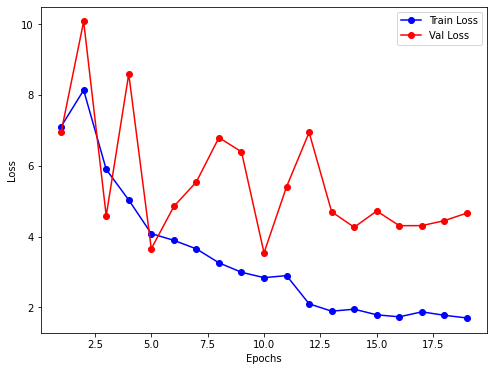

In [ ]:
plot(len(metric), metric['Train Loss'], metric['Validation Loss'], "Epochs", "Loss", "Train Loss", "Val Loss")

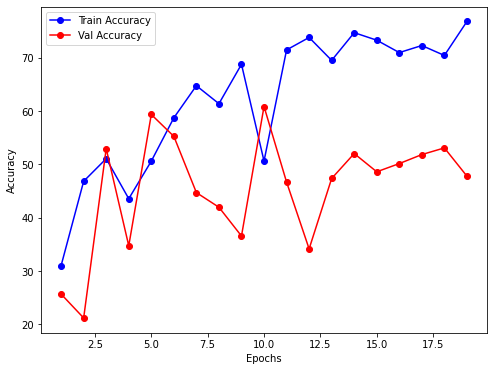

In [ ]:
plot(len(metric), metric['Train Accuracy'], metric['Validation Accuracy'], "Epochs", "Accuracy", "Train Accuracy", "Val Accuracy")

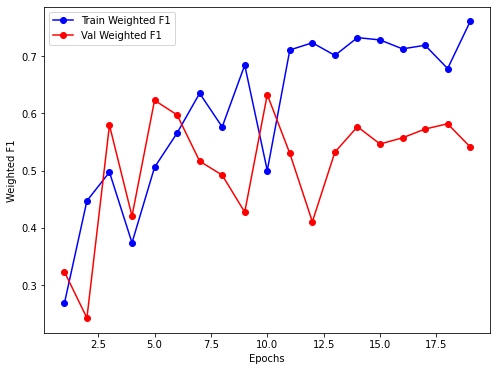

In [ ]:
plot(len(metric), metric['Train Weighted F1'], metric['Validation Weighted F1'], "Epochs", "Weighted F1", "Train Weighted F1", "Val Weighted F1")

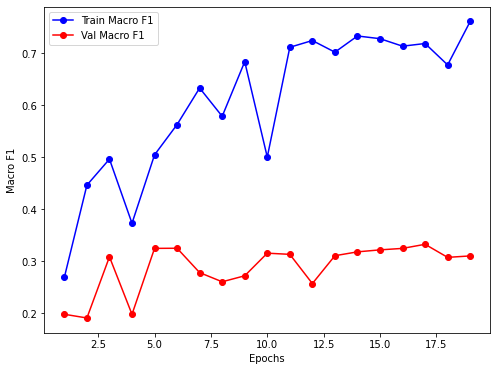

In [ ]:
plot(len(metric), metric['Train Macro F1'], metric['Validation Macro F1'], "Epochs", "Macro F1", "Train Macro F1", "Val Macro F1")

In [ ]:
import pandas as pd
results = pd.DataFrame(columns = ['Loss', 'Accuracy', 'Macro F1'], 
                   index = ['Sampled Train', 'Val','Test'])
results.loc['Sampled Train'] = [1.87, 72.3125, 71.90]
results.loc['Val'] = [4.31, 51.86, 33.253]
results.loc['Test'] = [3.79, 54.96, 32.27]

results

,Loss,Accuracy,Macro F1
Sampled Train,1.87,72.3125,71.9
Val,4.31,51.86,33.253
Test,3.79,54.96,32.27
